In [1]:
# Importing dependencies
import numpy as np
from PIL import Image
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import psycopg2
import sqlalchemy
import pandas as pd
import re

In [2]:
# Read data
fake_news_df = pd.read_csv('data/fake_news.csv', usecols=range(4))
real_news_df = pd.read_csv('data/real_news.csv', usecols=range(4))

In [3]:
# Add new column that will combine all columns to help determine fake and real news; this data will be used to train our model
fake_news_df['combined_text'] = fake_news_df['title'] + ' ' + fake_news_df['text']
real_news_df['combined_text'] = real_news_df['title'] + ' ' + real_news_df['text']

In [4]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Find highest frequency words found in fake news
fake_news_words = []
for index, row in fake_news_df.iterrows():
    text = row['combined_text']

    # Convert to lower case
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'[0-9]+', '', text)
    
    # Cleaning with regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    text_words = nltk.word_tokenize(text)
    
    # Remove stop words and add to list
    fake_news_words.extend([str(w) for w in text_words if not w in stop_words])
    
    
wcloud_fake_news_df = pd.DataFrame(fake_news_words, columns=['Words'])
wcloud_fake_news_df['Count'] = 1

wcloud_fake_news_df = wcloud_fake_news_df.groupby('Words')
wcloud_fake_news_df = wcloud_fake_news_df.agg({"Count": "sum"})

wcloud_fake_news = wcloud_fake_news_df.sort_values(by="Count", ascending=False)
    
    
# Find highest frequency words found in real news
real_news_words = []
for index, row in real_news_df.iterrows():
    text = row['combined_text']

    # Convert to lower case
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'[0-9]+', '', text)
    
    # Cleaning with regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    text_words = nltk.word_tokenize(text)
    
    # Remove stop words and add to list
    real_news_words.extend([str(w) for w in text_words if not w in stop_words])

In [5]:
# Adding list of words to dataframes
fake_news_words_df = pd.DataFrame(fake_news_words, columns=['Words'])
real_news_words_df = pd.DataFrame(real_news_words, columns=['Words'])

# Value count dataframes
fake_news_words_count = fake_news_words_df['Words'].value_counts()
real_news_words_count = real_news_words_df['Words'].value_counts()

# Count percentage of dataframes
fake_news_words_percent = fake_news_words_df['Words'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
real_news_words_percent = real_news_words_df['Words'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

# Word count summary tables
fake_news_words_summary_df = pd.DataFrame({"Total Count": fake_news_words_count,
                                       "Percentage": fake_news_words_percent})
real_news_words_summary_df = pd.DataFrame({"Total Count": real_news_words_count,
                                       "Percentage": real_news_words_percent})

# Formatting
fake_news_words_summary_df['Total Count'] = fake_news_words_summary_df.apply(lambda x: "{:,}".format(x['Total Count']), axis=1)
real_news_words_summary_df['Total Count'] = real_news_words_summary_df.apply(lambda x: "{:,}".format(x['Total Count']), axis=1)

In [18]:
# Find highest frequency words found in ALL news
news_words = fake_news_words + real_news_words

# Adding list of words to dataframes
news_words_df = pd.DataFrame(news_words, columns=['Words'])

# Value count dataframes
news_words_count = news_words_df['Words'].value_counts().reset_index()
news_words_count.columns = ['Words', 'Total Count']

# Word count summary tables
news_words_summary_df = pd.DataFrame({"Words": news_words_count['Words'],
                                      "Total Count": news_words_count['Total Count']})

# Formatting
news_words_summary_df['Total Count'] = news_words_summary_df.apply(lambda x: "{:,}".format(x['Total Count']), axis=1)
news_words_summary_df.head(10)

,Words,Total Count
0,said,"130,123"
1,trump,"128,227"
2,us,"67,868"
3,would,"55,220"
4,president,"52,518"
5,people,"41,524"
6,one,"35,949"
7,new,"32,468"
8,state,"32,051"
9,also,"30,908"


In [19]:
# Combine all words into one big string
wcloud_words = " ".join(word for word in news_words_summary_df['Words'])
wcloud_words

'said trump us would president people one new state also house reuters donald states obama clinton government republican could white united told like campaign news last two election time party first year former hillary even washington video country years many security may media say national political police get law made make court republicans since american going percent trumps bill presidential back says russia north senate support vote administration democratic week america know including officials think according group take way office federal foreign military public via called million right statement world department want saying tax well see congress day still tuesday russian democrats much image minister another women wednesday part go work china thursday friday asked city policy war black deal rights secretary monday official next americans committee york help general korea need three whether leader senator show never case man around order members candidate use report fbi meeting 

In [21]:
# Import PNG mask
mask = np.array(Image.open("./static/images/magnifying_glass.png"))
    
# Transform mask
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

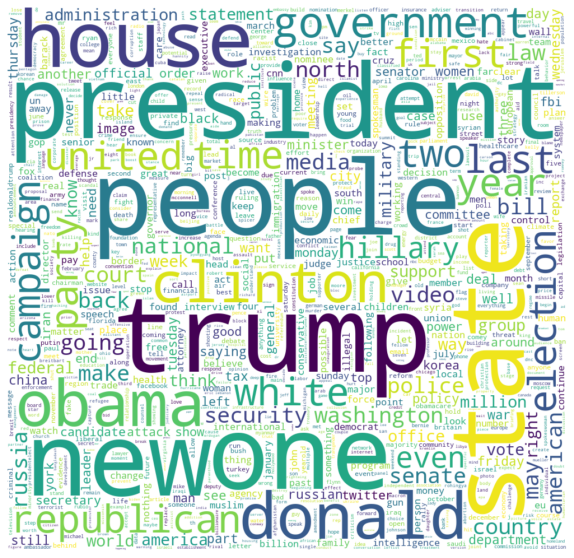

In [23]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_mask,
               contour_width=3, contour_color='black')

# Generate a wordcloud
wc.generate(wcloud_words)

# Store to file
wc.to_file("./static/images/word_cloud.png")

# Show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()